In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
group1 = np.array([252, 274, 214, 232, 244, 237, 246, 293, 242, 253, 250, 243, 247])
group2 = np.array([268, 272, 265, 262, 271, 266, 268, 275, 269, 264, 271, 262, 268, 266, 267, 261, 267])

# 1. Data Description

In [9]:
def describe(group, name):
    mean = np.mean(group)
    var = np.var(group, ddof=1)
    std = np.std(group, ddof=1)
    print(f"{name} -> Mean: {mean:.2f}, Variance: {var:.2f}, Std Dev: {std:.2f}")
    return mean, var, std

mean1, var1, std1 = describe(group1, "Group 1 (Non-Gamers)")
mean2, var2, std2 = describe(group2, "Group 2 (Gamers)")

print("\nDifference of Variances:", abs(var1 - var2))

Group 1 (Non-Gamers) -> Mean: 248.23, Variance: 363.36, Std Dev: 19.06
Group 2 (Gamers) -> Mean: 267.18, Variance: 14.28, Std Dev: 3.78

Difference of Variances: 349.0795625942685


# 2. Data Visualization

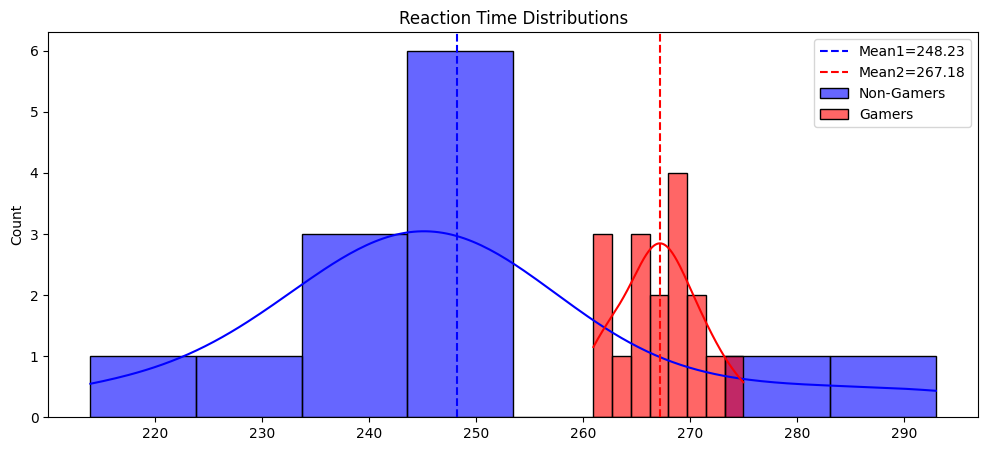

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(group1, bins=8, color="blue", kde=True, label="Non-Gamers", alpha=0.6)
plt.axvline(mean1, color="blue", linestyle="--", label=f"Mean1={mean1:.2f}")

sns.histplot(group2, bins=8, color="red", kde=True, label="Gamers", alpha=0.6)
plt.axvline(mean2, color="red", linestyle="--", label=f"Mean2={mean2:.2f}")

plt.title("Reaction Time Distributions")
plt.legend()
plt.show()

# 3. Random Number Generation

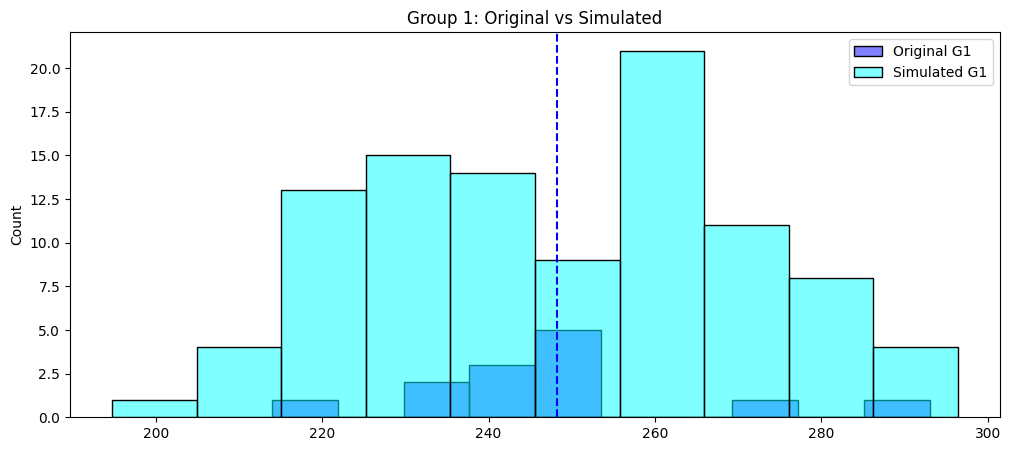

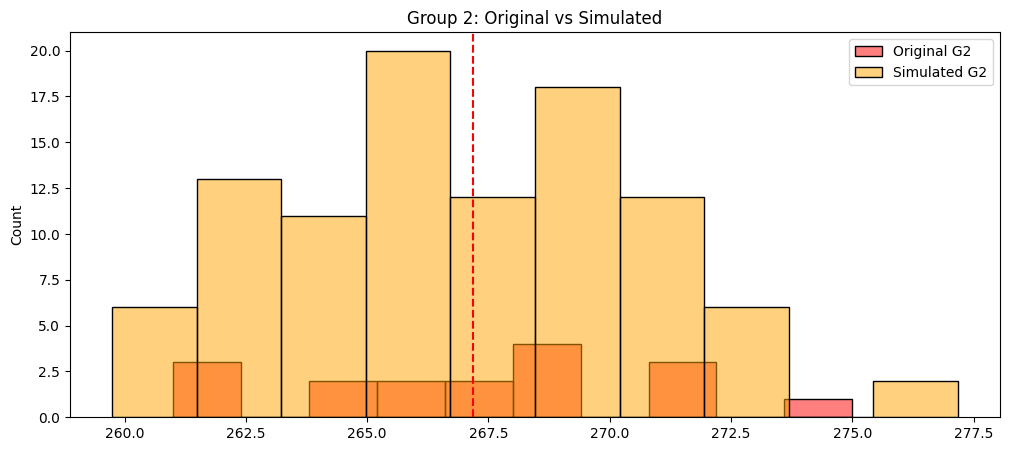

In [21]:
# Mean & Std
mean1, std1 = np.mean(group1), np.std(group1, ddof=1)
mean2, std2 = np.mean(group2), np.std(group2, ddof=1)

# Simulated Data
sim_group1 = np.random.normal(mean1, std1, 100)
sim_group2 = np.random.normal(mean2, std2, 100)

# Plot Group 1
plt.figure(figsize=(12,5))
sns.histplot(group1, bins=10, color="blue", alpha=0.5, label="Original G1")
sns.histplot(sim_group1, bins=10, color="cyan", alpha=0.5, label="Simulated G1")
plt.axvline(mean1, color="blue", linestyle="--")
plt.legend(); plt.title("Group 1: Original vs Simulated")
plt.show()

# Plot Group 2
plt.figure(figsize=(12,5))
sns.histplot(group2, bins=10, color="red", alpha=0.5, label="Original G2")
sns.histplot(sim_group2, bins=10, color="orange", alpha=0.5, label="Simulated G2")
plt.axvline(mean2, color="red", linestyle="--")
plt.legend(); plt.title("Group 2: Original vs Simulated")
plt.show()


# 5. Hypothesis Testing (Pooled t-test)


--- Hypothesis Testing ---
Pooled Variance: 163.88
t-statistic: -4.017, df=28, p-value=0.0004
Reject H0: Significant difference between groups
95% CI for Group 1 Mean: (np.float64(236.71173170076304), np.float64(259.7498067607754))
95% CI for Group 2 Mean: (np.float64(265.23358530609397), np.float64(269.11935587037664))


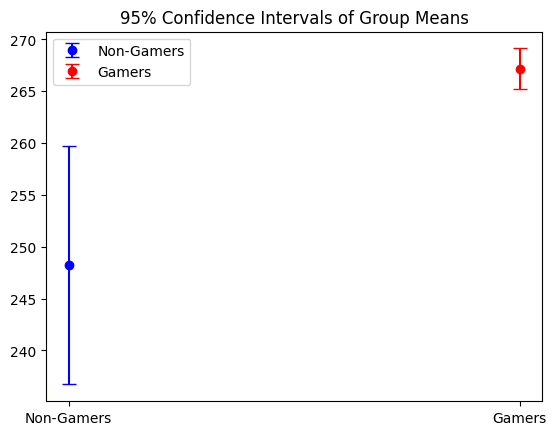

In [16]:
n1, n2 = len(group1), len(group2)
sp2 = (((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))   # pooled variance
sp = np.sqrt(sp2)

t_stat = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))
df = n1 + n2 - 2
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print("\n--- Hypothesis Testing ---")
print(f"Pooled Variance: {sp2:.2f}")
print(f"t-statistic: {t_stat:.3f}, df={df}, p-value={p_val:.4f}")

if p_val < 0.05:
    print("Reject H0: Significant difference between groups")
else:
    print("Fail to Reject H0: No significant difference")

# 95% Confidence Intervals
ci1 = stats.t.interval(0.95, n1-1, loc=mean1, scale=std1/np.sqrt(n1))
ci2 = stats.t.interval(0.95, n2-1, loc=mean2, scale=std2/np.sqrt(n2))
print(f"95% CI for Group 1 Mean: {ci1}")
print(f"95% CI for Group 2 Mean: {ci2}")

# Visualization of CI
plt.errorbar(1, mean1, yerr=(ci1[1]-mean1), fmt='o', color='blue', capsize=5, label="Non-Gamers")
plt.errorbar(2, mean2, yerr=(ci2[1]-mean2), fmt='o', color='red', capsize=5, label="Gamers")
plt.xticks([1,2], ["Non-Gamers", "Gamers"])
plt.title("95% Confidence Intervals of Group Means")
plt.legend()
plt.show()

# 6. Unique Personalization

In [18]:
# ID 1003
group2_personalized = group2 + 3
mean2p, var2p, std2p = describe(group2_personalized, "Group 2 (Gamers, Personalized)")

# Re-do t-test
sp2_p = (((n1-1)*var1 + (n2-1)*var2p) / (n1+n2-2))
sp_p = np.sqrt(sp2_p)
t_stat_p = (mean1 - mean2p) / (sp_p * np.sqrt(1/n1 + 1/n2))
p_val_p = 2 * (1 - stats.t.cdf(abs(t_stat_p), df))

print("\n--- Personalized Dataset Hypothesis Test ---")
print(f"t-statistic: {t_stat_p:.3f}, p-value={p_val_p:.4f}")
if p_val_p < 0.05:
    print("Reject H0: Significant difference (after personalization)")
else:
    print("Fail to Reject H0: No significant difference (after personalization)")

Group 2 (Gamers, Personalized) -> Mean: 270.18, Variance: 14.28, Std Dev: 3.78

--- Personalized Dataset Hypothesis Test ---
t-statistic: -4.653, p-value=0.0001
Reject H0: Significant difference (after personalization)
